In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [20]:
data_dir = "../Data/HAND2020-master"

train_dir ="../Data/dataset_split/train"
valid_train_dir ="../Data/dataset_split/valid_train"
test_dir ="../Data/dataset_split/test"



# Make Splited data folder

In [21]:
for folder in [train_dir ,valid_train_dir ,test_dir]:
    for i in range(10) :
        os.makedirs(os.path.join(folder,str(i)) ,exist_ok=True)

# count number of image for each class and split it to train ,test ,val_train

In [22]:
for i in range(10):
    class_folder = os.path.join(data_dir ,str(i))
    images = os.listdir(class_folder)
    n =len(images)
    print(f"number {i} has {n} images")
    
    train_valid , test =  train_test_split(images ,test_size=0.2 , random_state=42 )
    
    train ,val_train =train_test_split(train_valid ,test_size=0.2 ,random_state=42)

    for t in train :
        shutil.copy(os.path.join(class_folder ,t),
        os.path.join(train_dir, str(i) ,t))
        
    for v in val_train :
        shutil.copy(os.path.join(class_folder ,v),
        os.path.join(valid_train_dir, str(i) ,v))
    
    for te in test :
        shutil.copy(os.path.join(class_folder ,te),
        os.path.join(test_dir, str(i) ,te))
        



number 0 has 7200 images
number 1 has 7200 images
number 2 has 7200 images
number 3 has 7200 images
number 4 has 7200 images
number 5 has 7200 images
number 6 has 7200 images
number 7 has 7200 images
number 8 has 7200 images
number 9 has 7201 images


# count number of splited data

In [23]:


for folder in [train_dir, valid_train_dir, test_dir]:
    print(f"\nImages in {folder}:")
    for i in range(10):
        count = len(os.listdir(os.path.join(folder, str(i))))
        print(f"Class {i}: {count} images")


Images in ../Data/dataset_split/train:
Class 0: 4608 images
Class 1: 4608 images
Class 2: 4608 images
Class 3: 4608 images
Class 4: 4608 images
Class 5: 4608 images
Class 6: 4608 images
Class 7: 4608 images
Class 8: 4608 images
Class 9: 4608 images

Images in ../Data/dataset_split/valid_train:
Class 0: 1152 images
Class 1: 1152 images
Class 2: 1152 images
Class 3: 1152 images
Class 4: 1152 images
Class 5: 1152 images
Class 6: 1152 images
Class 7: 1152 images
Class 8: 1152 images
Class 9: 1152 images

Images in ../Data/dataset_split/test:
Class 0: 1440 images
Class 1: 1440 images
Class 2: 1440 images
Class 3: 1440 images
Class 4: 1440 images
Class 5: 1440 images
Class 6: 1440 images
Class 7: 1440 images
Class 8: 1440 images
Class 9: 1441 images


In [24]:
dataset_dir = "../Data/dataset_split"
splits = ["train", "valid_train", "test"]
image_size = (28, 28)

def load_and_preprocess(split_folder):
    images =[]
    labels =[]
    class_count ={}
    example_images ={}
    
    for i in range(10):
        class_folder =os.path.join(split_folder ,str(i))
        imgs =os.listdir(class_folder)
        class_count[i] =len(imgs)
        
        if imgs :
            example_images[i] = Image.open(os.path.join(class_folder, imgs[0])).convert('L') # gray scale
        
        for img_name in imgs :
            img_path =os.path.join(class_folder ,img_name)
            img = Image.open(img_path).convert('L')
            img_resized = img.resize(image_size)
            img_array = np.array(img_resized)
            images.append(img_array)
            labels.append(i)
    return np.array(images), np.array(labels), class_count, example_images


split_data = {}
for split in splits:
    images, labels, counts, examples = load_and_preprocess(os.path.join(dataset_dir, split))
    split_data[split] = {
        "images": images,
        "labels": labels,
        "counts": counts,
        "examples": examples
    }
            
            

/tmp/ipykernel_29637/4137804069.py:23: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_array = np.array(img_resized)


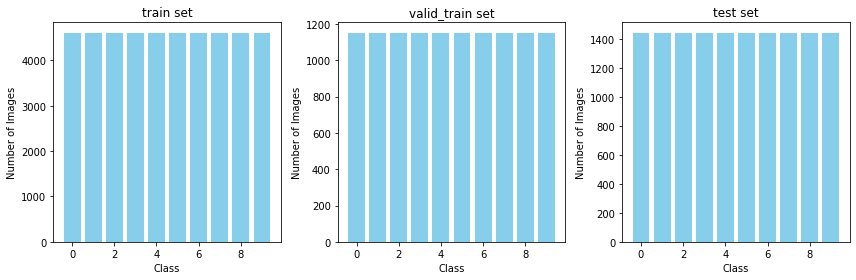

In [26]:
plt.figure(figsize=(12,4))
for idx, split in enumerate(splits):
    plt.subplot(1,3,idx+1)
    counts = split_data[split]["counts"]
    plt.bar(list(counts.keys()), list(counts.values()), color='skyblue')
    plt.title(f"{split} set")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

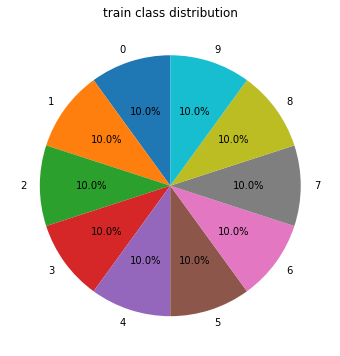

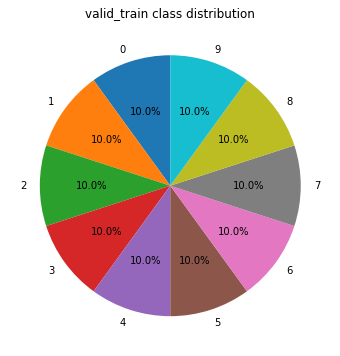

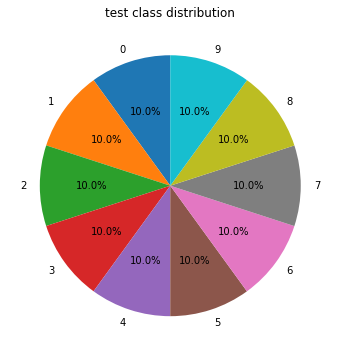

In [ ]:
for split in ["train", "valid_train", "test"]:
    counts = split_data[split]["counts"]
    plt.figure(figsize=(6,6))
    plt.pie(counts.values(), labels=counts.keys(), autopct="%1.1f%%", startangle=90)
    plt.title(f"{split} class distribution")
    plt.show()


### No outliers

In [28]:
import numpy as np

print("Pixel stats for train images:")
print("Min:", np.min(split_data["train"]["images"]))
print("Max:", np.max(split_data["train"]["images"]))
print("Mean:", np.mean(split_data["train"]["images"]))
print("Std:", np.std(split_data["train"]["images"]))


Pixel stats for train images:
Min: 0
Max: 255
Mean: 161.37200410111961
Std: 114.94946383555686


/tmp/ipykernel_29637/2802949019.py:21: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_array = np.array(img_resized) / 255.0  # Scale to 0-1


Train set: (46080, 28, 28, 1) (46080,)
Validation set: (11520, 28, 28, 1) (11520,)
Test set: (14401, 28, 28, 1) (14401,)


/tmp/ipykernel_29637/1569714216.py:34: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_array = np.array(img_resized) / 255.0  # Scale
/tmp/ipykernel_29637/1569714216.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(img_bad)/255.0


Original Train: (46080, 28, 28, 1) (46080,)
Bad Train: (46080, 28, 28, 1)
Validation: (11520, 28, 28, 1) (11520,)
Bad Validation: (11520, 28, 28, 1)
Test: (14401, 28, 28, 1) (14401,)
Bad Test: (14401, 28, 28, 1)


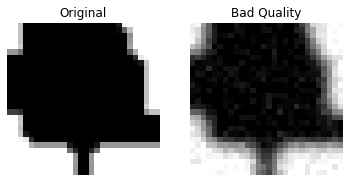

In [ ]:
num_classes = 10

def degrade_image(img_array, scale=0.5):
    img = Image.fromarray((img_array*255).astype(np.uint8))
    new_size = (int(img.width*scale), int(img.height*scale))
    img_small = img.resize(new_size, Image.BILINEAR)
    img_bad = img_small.resize((img.width, img.height), Image.BILINEAR)
    return np.array(img_bad)/255.0

def add_noise(img_array, noise_level=0.1):
    noise = np.random.normal(0, noise_level, img_array.shape)
    img_noisy = img_array + noise
    return np.clip(img_noisy, 0, 1)

def load_images(folder_path):
    images = []
    labels = []
    for class_idx in range(num_classes):
        class_folder = os.path.join(folder_path, str(class_idx))
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = Image.open(img_path).convert('L')  # Grayscale
            img_resized = img.resize(image_size)
            img_array = np.array(img_resized) / 255.0  # Scale
            images.append(img_array)
            labels.append(class_idx)
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels, dtype=np.int64)
    images = images.reshape(-1, image_size[0], image_size[1], 1)  # for CNN
    return images, labels


# clean dataset
X_train, y_train = load_images(os.path.join(dataset_dir, "train"))
X_val, y_val     = load_images(os.path.join(dataset_dir, "valid_train"))
X_test, y_test   = load_images(os.path.join(dataset_dir, "test"))

# low-quality version
X_train_bad = np.array([add_noise(degrade_image(x.squeeze()), noise_level=0.05) for x in X_train]).reshape(-1,28,28,1)
X_val_bad   = np.array([add_noise(degrade_image(x.squeeze()), noise_level=0.05) for x in X_val]).reshape(-1,28,28,1)
X_test_bad  = np.array([add_noise(degrade_image(x.squeeze()), noise_level=0.05) for x in X_test]).reshape(-1,28,28,1)

print("Original Train:", X_train.shape, y_train.shape)
print("Bad Train:", X_train_bad.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Bad Validation:", X_val_bad.shape)
print("Test:", X_test.shape, y_test.shape)
print("Bad Test:", X_test_bad.shape)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(X_train[9000].reshape(28,28), cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(X_train_bad[9000].reshape(28,28), cmap='gray')
plt.title("Bad Quality")
plt.axis('off')
plt.show()
